In [1]:
#
# phase3 :
#   model inference and learning
#
%matplotlib inline
import os
os.environ['THEANO_FLAGS'] = "mode=FAST_RUN,device=cpu,floatX=float32"
import theano
import theano.tensor as T
import config
import numpy as np
import matplotlib.pyplot as plt

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import network
import network.normFlow2 as nf
import models.mars2 as graph
import utils
import utils.mathT as mathT
import utils.theanoGeneral as utilsT
import utils.optimizers as optimizers
import utils.data as utilsD
import utils.plotZ as plotZ
DIM = 2
floatX = utils.floatX

In [3]:
# data generation
mg = graph.Banana()
mg.generate(100,'./data/banana1')

Data ready, size : 100 
 keys : x : (100,)
	z : (100, 2) : 


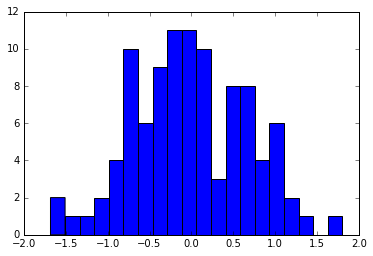

In [4]:
# loading data to object.Dataset0
BATCHSIZE = 5
rawd = np.load('./data/banana1.npz')
data = utilsD.Dataset0( rawd, outkeys=['x','z'], autoreshuffle=True, verbose=True)
NUMX = data.size
data.setBatchSize(BATCHSIZE)

rawx, rawz = rawd['x'], rawd['z']
plt.hist(rawx-np.prod(rawz,axis=1), bins=20 )
plt.show()

In [5]:
# constructing generic model
genmdl = graph.Banana()
x = T.fvector('x')
genmdl.setX(x)
genmdl.setParamValues( {'std':1.0} ) # initialise \theta

In [30]:
# constructing inference model 
NUM_LAYER = 4
SAMPLINGNUM = 10
ifmdl = nf.NormFlowModel(DIM,SAMPLINGNUM,BATCHSIZE,NUM_LAYER,noisestd=1.)
e = ifmdl.getNoiseVar()
z, logqz = ifmdl.reparam(e)

In [31]:
# set VI local parameters
viparams = nf.ModelParamSet(DIM,NUMX,NUM_LAYER)

In [78]:
# setting cost variable
logpxz, _, _ = genmdl.logPxz(x,z)              # B x N 
nelbo = T.mean( logqz - logpxz, axis=1 )   # B

params = ifmdl.getParams()

In [79]:
# setting local optimisation symbols
gradlst = list()
for i in range(BATCHSIZE):
    cost = nelbo[i]
    gradlst.append( [T.grad(cost,p,consider_constant=[e]) for p in params] )
    

In [ ]:
# looping for one mini-batch


In [11]:
# optimisation setup
iaf.reInit()
# opt = optimizers.Adadelta(params)
opt = optimizers.SGD(params,lr=0.05,momentum=0.5,decay=0.001)
updates = opt.getUpdates(params,grads)

outputs = [ cost, T.mean(logpxz), T.mean(logqz) ]
estep = theano.function(inputs=[x],outputs=outputs,updates=updates)

In [26]:
# training
NUMITER = 1000
keys = ['cost','pxz','qz']
record = {}
mb.setStd(0.5)
for k in keys:
    record[k] = []
for i in range(NUMITER):
    # running updates
    out = estep(3.)
    
    for i,q in enumerate(out):
        record[keys[i]].append( q )        
for k in keys:
    record[k] = np.asarray( record[k] )

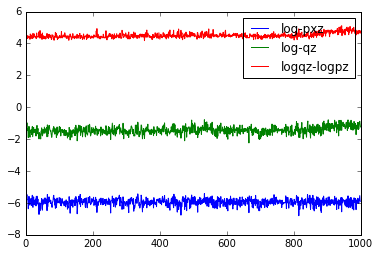

In [27]:
# plt.plot( range(NUMITER), record['cost'],'-' )
# plt.show()
xs = range(NUMITER)
plt.plot( xs, record['pxz'], '-', label='log-pxz')
plt.plot( xs, record['qz'], '-', label='log-qz')
plt.plot( xs, record['cost'], '-', label='logqz-logpz')
plt.legend()
plt.show()

In [14]:
e2 = iaf.getNoiseVar(2000)
z2, logqz2 = iaf.reparam(e2)
fez2 = theano.function(inputs=[],outputs=[e2,z2])

(2000, 2) (2000, 2)


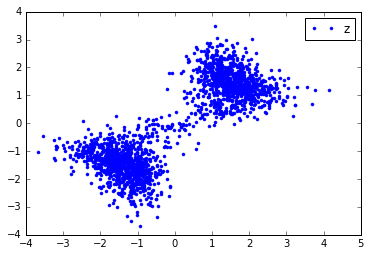

(2000, 2)
2.00271


In [15]:
es, zs = fez2()
print es.shape, zs.shape
# plt.plot(es[:,0],es[:,1],'.',label='e')
plt.plot(zs[:,0],zs[:,1],'.',label='z')
plt.legend(loc=1)
plt.show()
print zs.shape
print np.mean(np.prod(zs,axis=1))

In [3]:
out = dict()
keys = ['a','b']
out.update( )

TypeError: update expected at most 1 arguments, got 2